In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Load and prepare dataset

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

In [4]:
target_labels = np.unique(y_train)
print(f"Target labels: {target_labels}")

Target labels: [0 1]


## Create and train ML model 

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16, activation='relu', 
                                                   input_shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

/Users/mariotrerotola/Developer/DEXiRE/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# train the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=32)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6181 - loss: 8.8767 - val_accuracy: 0.3956 - val_loss: 4.4609
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4918 - loss: 2.6805 - val_accuracy: 0.6374 - val_loss: 1.9825
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.7115 - val_accuracy: 0.6703 - val_loss: 0.6982
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.5210 - val_accuracy: 0.8462 - val_loss: 0.6588
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8214 - loss: 0.4518 - val_accuracy: 0.8791 - val_loss: 0.4589
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8571 - loss: 0.3981 - val_accuracy: 0.8681 - val_loss: 0.3925
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3737 - val_accuracy: 0.9121 - val_loss: 0.3262
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3520 - val_accuracy: 0.9011 - val_loss

## Model evaluation 

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

In [9]:
y_pred = model.predict(X_test)
y_pred = np.rint(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



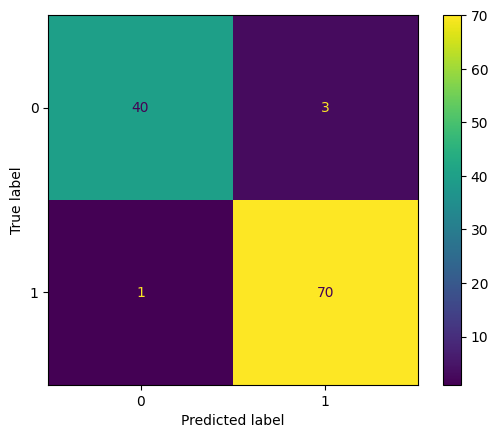

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels)
disp.plot()

## Rule extraction 

In [12]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [13]:
%load_ext autoreload
%autoreload 2
from dexire.dexire import DEXiRE

In [14]:
dexire = DEXiRE(model=model, class_names=['malignant', 'benign'])

In [15]:
# test extract at last layer level
rules_2 = dexire.extract_rules_at_layer(X_train,
                                        y_train)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [16]:
rules_2

[IF ((X_23 <= 868.2) AND (X_23 <= 826.8) AND (X_21 <= 39.075) AND (X_4 <= 0.128)) THEN 1.0, IF ((X_23 > 868.2) AND (X_20 > 16.94)) THEN 0.0, IF ((X_23 <= 868.2) AND (X_23 > 826.8)) THEN 1.0, IF ((X_23 > 868.2) AND (X_20 <= 16.94)) THEN 0.0, IF ((X_23 <= 868.2) AND (X_23 <= 826.8) AND (X_21 <= 39.075) AND (X_4 > 0.128)) THEN 1.0, IF ((X_23 <= 868.2) AND (X_23 <= 826.8) AND (X_21 > 39.075)) THEN 0.0]

In [17]:
rules = dexire.extract_rules(X_train, y_train)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
